In [50]:
!pip install opendatasets

In [51]:
import opendatasets as od
import pandas as pd
import os
import numpy as np
import folium
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "colab"

In [52]:
dataset = "https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand"
od.download(dataset)

Skipping, found downloaded files in "./hotel-booking-demand" (use force=True to force download)


In [53]:
data_dir = '/content/hotel-booking-demand'

In [54]:
df = pd.read_csv(os.path.join(data_dir, 'hotel_bookings.csv'))
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [56]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [57]:
df[['market_segment', 'distribution_channel']].head(5)

,market_segment,distribution_channel
0,Direct,Direct
1,Direct,Direct
2,Direct,Direct
3,Corporate,Corporate
4,Online TA,TA/TO


In [58]:
market_segment_counts = df['market_segment'].value_counts()
distribution_channel_counts = df['distribution_channel'].value_counts()
combined_counts_df = pd.DataFrame({'market_segment_counts': market_segment_counts, 'distribution_channel_counts': distribution_channel_counts})

print(combined_counts_df)

               market_segment_counts  distribution_channel_counts
Aviation                       237.0                          NaN
Complementary                  743.0                          NaN
Corporate                     5295.0                       6677.0
Direct                       12606.0                      14645.0
GDS                              NaN                        193.0
Groups                       19811.0                          NaN
Offline TA/TO                24219.0                          NaN
Online TA                    56477.0                          NaN
TA/TO                            NaN                      97870.0
Undefined                        2.0                          5.0


'market_segment' and 'distribution_channel' are related, we would like to drop the 'distribution_channel' column because it has less detail.

In [59]:
df.drop(['distribution_channel'],axis=1,errors='ignore')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


 Next, we will deal with missing data.

In [60]:
non_null_counts = df.count()
columns_with_less_data = non_null_counts[non_null_counts != df.shape[0]]

print(columns_with_less_data)

children    119386
country     118902
agent       103050
company       6797
dtype: int64


In [61]:
df = df.dropna(subset=['children', 'country'])
df = df.fillna(0)

In [62]:
nan_in_df = df.isnull().sum().sum()
print('Number of NaN values present: ' + str(nan_in_df))

Number of NaN values present: 0


In [63]:
df_backup = df.copy()
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,0.0,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0.0,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0.0,0,Transient,105.5,0,0,Canceled,2015-04-22


# 1.EDA

## What country do most guests come from?

In [64]:
df_guests = df.groupby('arrival_date_year')['country'].value_counts().reset_index()
df_guests.head(5)

,arrival_date_year,country,count
0,2015,PRT,13303
1,2015,ESP,1932
2,2015,GBR,1356
3,2015,FRA,1348
4,2015,ITA,547


In [65]:
fig = px.choropleth(df_guests, locations='country', color='count', hover_name='country',
                    projection='natural earth', animation_frame='arrival_date_year',
                    title='Number of guests from each country by year')
fig.show()

*   Most of the guests come from Europe. Most of them are Portuguese.




## What is the average number of guests staying each month?

In [66]:
df_guest_month = df
df_guest_month= pd.DataFrame(df.groupby(['arrival_date_month']).size().reset_index(name='guest_count'))
df_guest_month['Not Canceled'] = df[df['is_canceled'] == 0].groupby(['arrival_date_month']).size().values
df_guest_month['Canceled'] = df[df['is_canceled'] == 1].groupby(['arrival_date_month']).size().values
df_guest_month.set_index('arrival_date_month', inplace=True)

In [67]:
def divide_value(row):
    if row.name in ['August','July']:
        return row // 3
    else:
        return row // 2

numeric_columns = df_guest_month.select_dtypes(include=['number']).columns
df_guest_month[numeric_columns] = df_guest_month[numeric_columns].apply(divide_value, axis=1)
df_guest_month

,guest_count,Not Canceled,Canceled
arrival_date_month,,,
April,5522,3266,2256
August,4617,2872,1744
December,3364,2182,1181
February,4006,2658,1347
January,2937,2034,903
July,4209,2630,1578
June,5463,3196,2267
March,4869,3295,1574
May,5889,3551,2338


Find the average number of guests staying each month. Each month has a different amount of data. Therefore, we must create a function to find the average.

In [68]:
plt.figure(figsize = (12, 4))

px.bar(df_guest_month, x = df_guest_month.index, y = ['Not Canceled','Canceled'],
        title = 'Number of guests each month classified by Canceled and Not_Canceled.')

<Figure size 1200x400 with 0 Axes>


*   The ratio of Canceled to Not_Canceled was similar every month.



## Compare the number of Canceled and Not Canceled.

In [69]:
month_to_number = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                  'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month'] = df['arrival_date_month'].map(month_to_number)

In [70]:
df_timeseries = pd.DataFrame(df.groupby(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']).size().reset_index(name='guest_count'))
df_timeseries['Not Canceled'] = df[df['is_canceled'] == 0].groupby(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']).size().values
df_timeseries['Canceled'] = df[df['is_canceled'] == 1].groupby(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']).size().values
df_timeseries['date'] = pd.to_datetime(df_timeseries['arrival_date_year'].astype(str) + '-' + df_timeseries['arrival_date_month'].astype(str) + '-' + df_timeseries['arrival_date_day_of_month'].astype(str), format='%Y-%m-%d')
df_timeseries.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)
df_timeseries.set_index('date', inplace=True)
df_timeseries.head()

,guest_count,Not Canceled,Canceled
date,,,
2015-07-01,118,99,19
2015-07-02,93,36,57
2015-07-03,56,37,19
2015-07-04,88,45,43
2015-07-05,53,37,16


In [71]:
plt.figure(figsize = (12, 4))

px.line(df_timeseries, x = df_timeseries.index, y = ['guest_count'],
        title = 'Number of guest coming to stay in the hotel each day')

<Figure size 1200x400 with 0 Axes>

In [72]:
plt.figure(figsize = (12,4))

px.line(df_timeseries, x = df_timeseries.index, y = ['Not Canceled','Canceled'],
        title = "Number of guests who canceled vs. guests who didn't cancel")

<Figure size 1200x400 with 0 Axes>

## How does the 'marget_segment' category affect cancellations?

In [73]:
df_marget = pd.DataFrame(df.groupby(['market_segment']).size().reset_index(name='guest_count'))
df_marget['Canceled'] = df[df['is_canceled'] == 1].groupby(['market_segment']).size().values
df_marget['Canceled_ratio'] = ((df_marget['Canceled'] / df_marget['guest_count']) * 100).round(2)
df_marget

,market_segment,guest_count,Canceled,Canceled_ratio
0,Aviation,237,52,21.94
1,Complementary,734,90,12.26
2,Corporate,5111,978,19.14
3,Direct,12448,1920,15.42
4,Groups,19806,12097,61.08
5,Offline TA/TO,24160,8278,34.26
6,Online TA,56402,20738,36.77


In [74]:
plt.figure(figsize = (12, 4))
fig = go.Figure(data=[go.Pie(labels=df_marget['market_segment'], values=df_marget['Canceled_ratio'], hole=.3)])
fig.update_layout(title='Canceled Ratio by Market Segment')
fig.show()

<Figure size 1200x400 with 0 Axes>



*   The most popular booking channels are Online TA, Offline TA/TO, Groups and Direct respectively.
*  But it is clear that the channels with the most canceled bookings are Group, Online TA, and Offline TA/TO respectively, which is different from Direct, which has about the same number of bookings but has a lower cancellation ratio.



## Does the number of days prior to the stay affect cancellation?

In [75]:
plt.figure(figsize = (12, 4))
fig = px.violin(df, y='lead_time',  color="is_canceled", box=True)
fig.show()

<Figure size 1200x400 with 0 Axes>

*   From the figure, it is indicated that most of the guests who do not cancel their reservations. There will be a lower number of booking days before the arrival date than guests who cancel their reservations. The median stay for guests who didn't cancel was 46 days, and for guests who canceled it was 113 days.
*   It can be concluded that the longer the number of days before the stay, the higher the chance of canceling the reservation.

## Accommodation type and number of cancellations

In [76]:
df_hotel = df[df['hotel'] == 'City Hotel']
df_resort = df[df['hotel'] == 'Resort Hotel']

hotel_is_canceled = (df_hotel['is_canceled'] == 1).sum()
hotel_canceled = (df_hotel['is_canceled'] == 0).sum()
resort_is_canceled = (df_resort['is_canceled'] == 1).sum()
resort_canceled = (df_resort['is_canceled'] == 0).sum()

In [77]:
labels = ["Canceled","Not Canceled"]
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],subplot_titles=['City Hotel', 'Resort Hotel'])
fig.add_trace(go.Pie(labels=labels, values=[hotel_is_canceled, hotel_canceled], name="City Hotel",pull=[ 0, 0.1]),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[resort_is_canceled, resort_canceled], name="Resort Hotel",pull=[ 0, 0.1]),
              1, 2)
fig.update_layout(
    title_text="Ratio of Canceled and Not Canceled by each type of accommodation")
fig.show()

*   City Hotel has a higher percentage of cancellations. And almost half of the reservations were canceled.


# 2.Preprocessing

First, we will remove features that are not relevant.

In [78]:
df.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'days_in_waiting_list', 'reservation_status', 'previous_bookings_not_canceled', 'reservation_status_date'], axis=1,errors='ignore', inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,3,No Deposit,0.0,0.0,Transient,0.00,0,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,4,No Deposit,0.0,0.0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,0,No Deposit,0.0,0.0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,0,No Deposit,304.0,0.0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,0,0,No Deposit,240.0,0.0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,0,No Deposit,394.0,0.0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,0,0,No Deposit,9.0,0.0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,0,0,No Deposit,9.0,0.0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,0,No Deposit,89.0,0.0,Transient,104.40,0,0


Negative values must be deleted because they cannot contain negative data.

In [79]:
numeric_columns = df.select_dtypes(include=['number'])
negative_count = (numeric_columns < 0).sum()
print(negative_count)

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


In [80]:
df = df[df['adr'] >= 0]

Since the number of guest from each country is not equal, we would like to categorize it into 3 groups.

In [81]:
mapping = {}
for country in df['country']:
    if country == 'PRT':
        mapping[country] = 0
    elif country in ['FRA', 'GBR', 'ESP', 'IRL']:
        mapping[country] = 1
    elif country not in mapping:
        mapping[country] = 2

df.loc[:,'country'] = df['country'].replace(mapping)
df['country'].value_counts()

country
0    48586
2    35825
1    34486
Name: count, dtype: int64

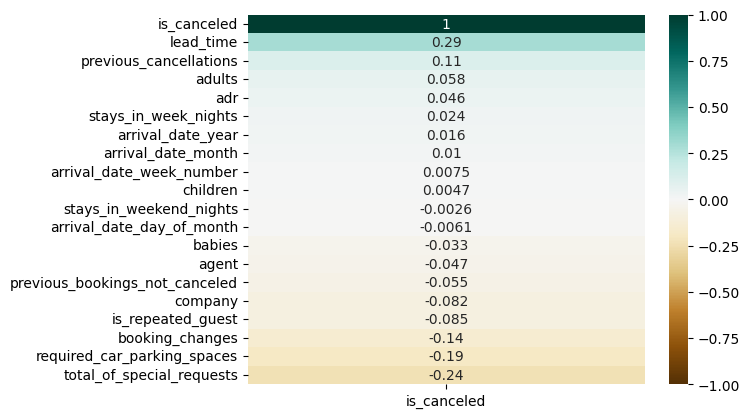

In [82]:
df_corr = df.select_dtypes(exclude=[object])
heatmap = sns.heatmap(df_corr.corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

###Feature Engineering

In [83]:
for i, col in enumerate(df.columns.tolist(), 1):
    print(f"{i}. {col}")

1. hotel
2. is_canceled
3. lead_time
4. arrival_date_year
5. arrival_date_month
6. arrival_date_week_number
7. arrival_date_day_of_month
8. stays_in_weekend_nights
9. stays_in_week_nights
10. adults
11. children
12. babies
13. country
14. market_segment
15. distribution_channel
16. is_repeated_guest
17. previous_cancellations
18. previous_bookings_not_canceled
19. booking_changes
20. deposit_type
21. agent
22. company
23. customer_type
24. adr
25. required_car_parking_spaces
26. total_of_special_requests


In [88]:
df.loc[:, 'number_of_guest'] = df['adults'] + df['children'] + df['babies']
df = df[df['number_of_guest'] != 0]
df.loc[:, 'number_of_kid'] = df['children'] + df['babies']

df.loc[:, 'total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,number_of_guest,number_of_kid,total_stay
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,No Deposit,0.0,0.0,Transient,0.0,0,0,2.0,0.0,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,No Deposit,0.0,0.0,Transient,0.0,0,0,2.0,0.0,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,No Deposit,0.0,0.0,Transient,75.0,0,0,1.0,0.0,1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,No Deposit,304.0,0.0,Transient,75.0,0,0,1.0,0.0,1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,No Deposit,240.0,0.0,Transient,98.0,0,1,2.0,0.0,2
